In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [78]:
def mass_balance(H, t):
    freq = 1 #Hz
    
    Ek = 5
    I0 = Ek/2
    A = Ek/3
    phi = 0
    w = 2 * np.pi * freq
    
    I = I0 + A*np.sin(w*t + phi)
    
    B = 10 #Charges/time entering when I-> infinity
    
    Fin = B*(1-np.exp(-I/Ek)) #charges entering the lumen/time
    
    C = 10 #Charges/time leaving when H -> infinity 
    
    Ak = 10
    
    Fout = C*(1-np.exp(-H/Ak))
    
    alfa = 1
    
    dHdt = alfa*(Fin - Fout)
    
    return dHdt
    

In [79]:
#initial conditions
H0 = 0

#time steps

time = np.linspace(0,50,1000)

In [80]:
solution=odeint(mass_balance,H0,time)


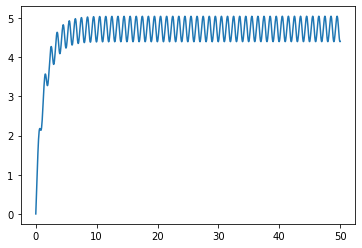

In [81]:
plt.plot(time, solution)

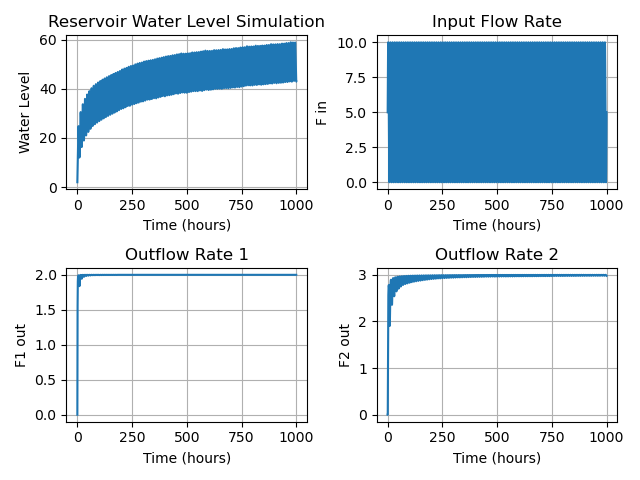

In [16]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib widget
import sys
import os


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import math_functions as mf

def F1_out(y, y_1, y_1_sat, F1_sat):
    if y < y_1:
        return 0
    else:
        return mf.exp_saturation(y - y_1, F1_sat, y_1_sat, 0)
    
def F2_out(y, y_2, y_2_sat, F2_sat):
    if y < y_2:
        return 0
    else:
        return mf.exp_saturation(y - y_2, F2_sat, y_2_sat, 0)

def inflow_rate(t, amplitude, frequency, offset):
    return offset + amplitude * np.sin(2 * np.pi * frequency * t)

def reservoir_ode(t, y, amplitude, frequency, offset, y_1, y_1_sat, F1_sat, y_2, y_2_sat, F2_sat):
    inflow = inflow_rate(t, amplitude, frequency, offset)
    outflow = F1_out(y, y_1, y_1_sat, F1_sat) + F2_out(y, y_2, y_2_sat, F2_sat)
    return inflow - outflow

def simulate_reservoir(amplitude, frequency, offset, y_1, y_1_sat, F1_sat, y_2, y_2_sat, F2_sat, initial_level, total_time, num_time_points):
    time_span = (0, total_time)
    time_points = np.linspace(*time_span, num_time_points)
    y0 = [initial_level]

    solution = solve_ivp(reservoir_ode, time_span, y0, t_eval=time_points, args=(amplitude, frequency, offset, y_1, y_1_sat, F1_sat, y_2, y_2_sat, F2_sat))
    return solution.t, solution.y[0]

if __name__ == "__main__":
    amplitude = 5     # Amplitude of the sinusoidal inflow
    offset = 5 # Offset of the sinusoidal inflow
    frequency = 0.1    # Frequency of the sinusoidal inflow
    y_1 = 2          # Parameter 'y_1' of the outflow function
    y_1_sat = 4      # Parameter 'y_1_sat' of the outflow function
    F1_sat = 2       # Parameter 'F1_sat' of the outflow function  
    y_2 = 4         # Parameter 'y_2' of the outflow function
    y_2_sat = 8      # Parameter 'y_2_sat' of the outflow function
    F2_sat = 3       # Parameter 'F2_sat' of the outflow function
    
    initial_water_level = 2   # Initial water level in units
    total_simulation_time = 1000   # Total time for simulation
    num_time_points = 100000        # Number of time points for the simulation

    time_points, water_levels = simulate_reservoir(amplitude, frequency, offset, y_1, y_1_sat, F1_sat, y_2, 
                                                   y_2_sat, F2_sat, initial_water_level, total_simulation_time, num_time_points)

    # Create subplots and plot the results
    fig, ax = plt.subplots(2,2)
    ax = ax.flatten()
    ax[0].plot(time_points, water_levels)
    ax[0].set_xlabel("Time (hours)")
    ax[0].set_ylabel("Water Level")
    ax[0].set_title("Reservoir Water Level Simulation")
    ax[0].grid(True)
    
    ax[1].plot(time_points, inflow_rate(time_points, amplitude, frequency, offset))
    ax[1].set_xlabel("Time (hours)")
    ax[1].set_ylabel("F in")
    ax[1].set_title("Input Flow Rate")
    ax[1].grid(True)
    
    F1_out_simu = np.zeros_like(water_levels)
    F2_out_simu = np.zeros_like(water_levels)
    for i in range(len(water_levels)):
        F1_out_simu[i] = F1_out(water_levels[i], y_1, y_1_sat, F1_sat)
        F2_out_simu[i] = F2_out(water_levels[i], y_2, y_2_sat, F2_sat)
    
    ax[2].plot(time_points, F1_out_simu)
    ax[2].set_xlabel("Time (hours)")
    ax[2].set_ylabel("F1 out")
    ax[2].set_title("Outflow Rate 1")
    ax[2].grid(True)
    
    ax[3].plot(time_points, F2_out_simu)
    ax[3].set_xlabel("Time (hours)")
    ax[3].set_ylabel("F2 out")
    ax[3].set_title("Outflow Rate 2")
    ax[3].grid(True)
    fig.tight_layout()
    
    plt.show()
